In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import pandas as pd
import h5py
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import csv
#import pydotplus as pdp

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
dic_type={}
dic_type[1]="str"
dic_type[2]="str"
for i in range(3,11691):
    dic_type[2]="float64"

In [3]:
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [17]:
print(merged_tsv3.iloc[1:80,:].values)

[[0.9523401088197916 0.0 1.7339167843419694 ... 0.0 0.0 0.0]
 [0.0 0.0 0.7452293606682078 ... 0.0 0.0 0.0]
 [0.0 0.0 2.9162661613050176 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 28.43705157723342 ... 0.0 0.0 0.0]
 [0.0 0.0 0.9253910505345556 ... 0.0 0.0 0.0]
 [0.8666048035450141 0.0 1.5797158401172011 ... 0.0 0.0 0.0]]


In [18]:
#分割して保存
np.save("TCGA-ACC.htseq_fpkm.npy",merged_tsv3.iloc[1:80,:].values)

In [19]:
merged_tsv3.iloc[1:80,:].shape
#np.save("train.npy",ft4)
#np.save("test.npy",df4)

(79, 56202)

In [4]:
ft4=np.load("train.npy")
df4=np.load("test.npy")

In [5]:
def zscore_wd(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [6]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis)#, keepdims=True)
    xstd  = np.std(x, axis=axis)#, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [7]:
ft4_1=zscore_wd(ft4,axis=1)

In [8]:
del ft4

In [9]:
X_train, X_test, y_train, y_test =train_test_split(ft4_1,df4)
#print(ft3.shape,X_train.shape,y_train.shape)
#print(ft3.shape,X_train.shape,y_train.shape)

In [10]:
from keras.models import Sequential,optimizers
from keras.layers import Dense,Activation,Dropout
opt=optimizers.SGD(lr=0.01)
#opt=optimizers.rmsprop(lr=0.001)
X_train,X_valid=np.split(X_train,[6000])
y_train,y_valid=np.split(y_train,[6000])
model1=Sequential()
model1.add(Dropout(0.05,input_shape=(56202,)))
model1.add(Dense(2048))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(512,activation='relu'))
#model1.add(Dense(512,activation='relu'))
model1.add(Dense(512,activation='relu'))
#model1.add(Dense(256,activation='relu'))
#model1.add(Dense(256,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(30))
model1.add(Activation("softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
fit=model1.fit(X_train,y_train,epochs=100,batch_size=512,verbose=2,validation_data=(X_valid,y_valid),callbacks=[])
score=model1.evaluate(X_test,y_test,batch_size=64)

Using TensorFlow backend.
/usr/local/pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 6000 samples, validate on 2766 samples
Epoch 1/100
 - 6s - loss: 4.5514 - acc: 0.1043 - val_loss: 3.2339 - val_acc: 0.1345
Epoch 2/100
 - 3s - loss: 2.7603 - acc: 0.2815 - val_loss: 2.3699 - val_acc: 0.3279
Epoch 3/100
 - 3s - loss: 2.3420 - acc: 0.3850 - val_loss: 1.8496 - val_acc: 0.5145
Epoch 4/100
 - 2s - loss: 1.8189 - acc: 0.5280 - val_loss: 1.9332 - val_acc: 0.4873
Epoch 5/100
 - 3s - loss: 1.7050 - acc: 0.5600 - val_loss: 1.3438 - val_acc: 0.6634
Epoch 6/100
 - 3s - loss: 1.3502 - acc: 0.6497 - val_loss: 1.3021 - val_acc: 0.6555
Epoch 7/100
 - 3s - loss: 1.3202 - acc: 0.6558 - val_loss: 1.4690 - val_acc: 0.5871
Epoch 8/100
 - 3s - loss: 1.0907 - acc: 0.7095 - val_loss: 0.8161 - val_acc: 0.7827
Epoch 9/100
 - 3s - loss: 0.9816 - acc: 0.7390 - val_loss: 1.0110 - val_acc: 0.7469
Epoch 10/100
 - 3s - loss: 0.8653 - acc: 0.7735 - val_loss: 0.6906 - val_acc: 0.8290
Epoch 11/100
 - 3s - loss: 0.7290 - acc: 0.7973 - val_loss: 0.5494 - val_acc: 0.8557
Epoch 12/100
 - 3s - loss:

Epoch 97/100
 - 3s - loss: 0.1209 - acc: 0.9615 - val_loss: 0.1605 - val_acc: 0.9469
Epoch 98/100
 - 3s - loss: 0.1100 - acc: 0.9642 - val_loss: 0.1305 - val_acc: 0.9667
Epoch 99/100
 - 3s - loss: 0.1388 - acc: 0.9543 - val_loss: 0.1567 - val_acc: 0.9512
Epoch 100/100
 - 3s - loss: 0.1262 - acc: 0.9568 - val_loss: 0.1498 - val_acc: 0.9588
2922/2922 [==============================] - 1s 250us/step


In [11]:
pred_y=model1.predict(X_test)

In [42]:
pred_y

array([[7.8565849e-05, 5.2899081e-04, 5.9074114e-06, ..., 5.6164332e-05,
        9.5769936e-10, 7.8548364e-06],
       [4.6994395e-05, 3.0082577e-07, 9.9767658e-06, ..., 2.1815984e-05,
        1.1969380e-03, 1.9048511e-04],
       [9.0014539e-05, 6.2284977e-07, 1.0362165e-03, ..., 9.8021201e-07,
        1.6960814e-05, 1.7668510e-05],
       ...,
       [9.2382598e-01, 3.1136055e-04, 1.3842146e-04, ..., 7.8635890e-04,
        3.2411808e-07, 3.7034761e-04],
       [2.0584758e-02, 1.8866463e-02, 4.2640488e-04, ..., 6.2244912e-03,
        5.4697580e-07, 2.9535935e-04],
       [1.5763009e-05, 6.7580413e-07, 6.2255145e-05, ..., 3.2493816e-07,
        8.9332485e-07, 1.5647569e-06]], dtype=float32)

In [12]:
np.sum(np.argmax(pred_y,axis=1)==np.argmax(y_test,axis=1))/pred_y.shape[0]

0.9537987679671458

In [13]:
print(X_test.shape)

(2922, 56202)


In [35]:
print(merged_tsv3.iloc[1:80,:].shape)

(79, 56202)


In [26]:
y_test[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [14]:
del ft4_1

In [15]:
del X_train

In [ ]:
df2=pd.read_csv("answer.csv", delimiter="\t")
c = collections.Counter(df2["SMT"])

In [17]:
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [23]:
ft2.head()

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,-0.082987,-0.058305,-0.051023,-0.050938,-0.031879,-0.036824,-0.046011,-0.064201,...,-0.007404,-0.023319,-0.012711,-0.010912,-0.019300,-0.013588,-0.032820,-0.012237,-0.016445,-0.026980
1,ENSG00000227232.4,WASH7P,0.016926,-0.022307,-0.002995,-0.027579,-0.018158,-0.017474,-0.019980,-0.015354,...,-0.005800,-0.006162,-0.008807,-0.007362,-0.010537,-0.007907,-0.010035,-0.003707,-0.009147,-0.007695
2,ENSG00000243485.2,MIR1302-11,-0.082743,-0.058475,-0.050949,-0.051004,-0.031774,-0.036920,-0.045736,-0.063786,...,-0.007408,-0.023464,-0.012786,-0.010847,-0.020043,-0.014089,-0.032945,-0.012531,-0.016621,-0.027120
3,ENSG00000237613.2,FAM138A,-0.083258,-0.058687,-0.050999,-0.050911,-0.031879,-0.036920,-0.045867,-0.064065,...,-0.007442,-0.023422,-0.012733,-0.010892,-0.020043,-0.014076,-0.033045,-0.012493,-0.016637,-0.027150
4,ENSG00000268020.2,OR4G4P,-0.083494,-0.058687,-0.051084,-0.051004,-0.031879,-0.036920,-0.045803,-0.064337,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.032883,-0.012531,-0.016665,-0.027136


In [18]:
ft2.iloc[:,2:]=zscore(ft2.iloc[:,2:])


In [19]:
ft2.iloc[:,0]=ft2.iloc[:,0].str[:15]

In [ ]:
import collections
import matplotlib.pyplot as plt
tsv=pd.read_csv("patient_data/TCGA-ESCA.htseq_fpkm.tsv", delimiter="\t")
#change FPKM to TPM
tsv.iloc[:,1:]=1000000*tsv.iloc[:,1:]/tsv.iloc[:,1:].sum()
tsv.iloc[:,1:]=zscore(tsv.iloc[:,1:])
tsv.iloc[:,0]=tsv.iloc[:,0].str[:15]
merge_tsv=pd.merge(tsv,ft2, left_on='Ensembl_ID', right_on='Name', how='right')

#print(merge_tsv.shape)
#（先に正規化する）欠損値補完
merge_tsv2=merge_tsv.transpose()
del merge_tsv
merged_tsv3=merge_tsv2.fillna(merge_tsv2.iloc[tsv.shape[1]+2:,:].mean())

(array([4.0493e+04, 2.8520e+03, 3.6960e+03, 2.2470e+03, 1.3650e+03,
        8.7500e+02, 5.3800e+02, 6.4300e+02, 1.8500e+02, 6.0000e+00]),
 array([0.        , 0.89427693, 1.78855385, 2.68283078, 3.57710771,
        4.47138464, 5.36566156, 6.25993849, 7.15421542, 8.04849234,
        8.94276927]),
 <a list of 10 Patch objects>)

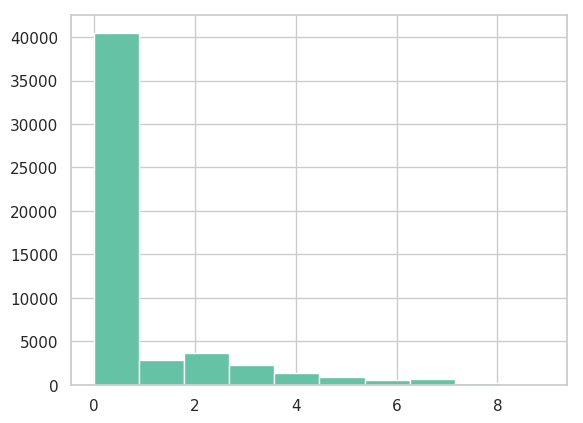

In [25]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0771e+04, 3.2950e+03, 3.6180e+03, 2.4480e+03, 8.0000e+02,
        9.6600e+02, 5.7800e+02, 3.9400e+02, 2.8000e+01, 2.0000e+00]),
 array([  0.        ,  21.0990017 ,  42.19800341,  63.29700511,
         84.39600682, 105.49500852, 126.59401023, 147.69301193,
        168.79201364, 189.89101534, 210.99001705]),
 <a list of 10 Patch objects>)

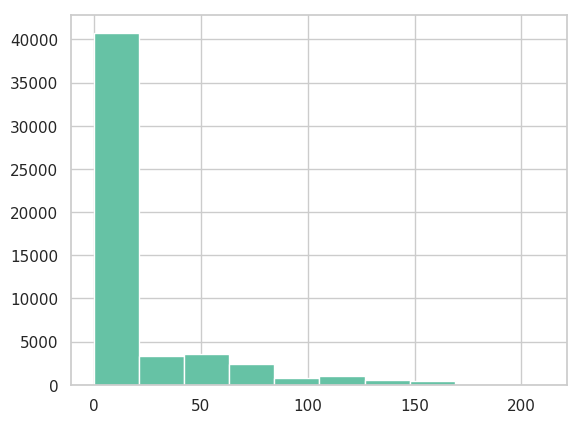

In [27]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0289e+04, 2.8640e+03, 3.7270e+03, 2.3030e+03, 1.4610e+03,
        8.4800e+02, 5.6300e+02, 6.4400e+02, 1.9600e+02, 5.0000e+00]),
 array([-0.59264485,  0.04633357,  0.68531199,  1.32429041,  1.96326883,
         2.60224725,  3.24122567,  3.88020408,  4.5191825 ,  5.15816092,
         5.79713934]),
 <a list of 10 Patch objects>)

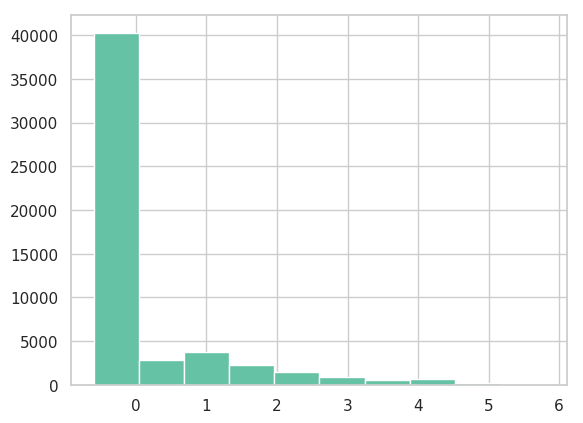

In [29]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

In [78]:
merge_tsv

,Ensembl_ID,TCGA-2V-A95S-01A,TCGA-2Y-A9GS-01A,TCGA-2Y-A9GT-01A,TCGA-2Y-A9GU-01A,TCGA-2Y-A9GV-01A,TCGA-2Y-A9GW-01A,TCGA-2Y-A9GX-01A,TCGA-2Y-A9GY-01A,TCGA-2Y-A9GZ-01A,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000242268,0.481830,-0.389422,-0.468183,-0.452784,-0.480123,-0.277476,-0.345220,-0.462646,-0.476476,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.033045,-0.012531,-0.016665,-0.027202
1,ENSG00000270112,-0.488719,-0.498779,-0.462844,-0.447663,-0.480123,-0.468984,-0.495551,-0.492843,-0.476476,...,-0.007394,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.033045,-0.012531,-0.016601,-0.027202
2,ENSG00000167578,1.424449,0.584578,0.862543,0.739657,0.498211,1.001033,0.590229,1.085875,0.351551,...,0.005612,0.129242,0.046995,0.018623,0.054077,0.022018,0.198918,0.030287,0.094323,0.102697
3,ENSG00000078237,0.547024,0.581418,0.358121,0.023904,0.559942,1.078654,0.674714,0.504448,0.352876,...,-0.006556,0.001621,-0.006993,-0.007831,-0.015632,-0.009607,-0.018879,-0.010855,-0.007084,-0.014778
4,ENSG00000146083,1.913456,1.528277,1.560282,1.453905,1.321983,1.450618,1.631147,1.425856,1.266441,...,-0.000453,0.049443,0.019680,0.000090,0.021049,0.023361,0.035299,0.003653,0.024546,0.080347
5,ENSG00000225275,-0.488719,-0.498779,-0.468183,-0.452784,-0.480123,-0.468984,-0.495551,-0.492843,-0.476476,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.033045,-0.012531,-0.016665,-0.027202
6,ENSG00000158486,-0.484016,-0.493317,-0.468183,-0.447529,-0.476058,-0.455843,-0.490967,-0.475535,-0.469053,...,-0.007441,-0.023503,-0.012784,-0.010908,-0.020033,-0.014128,-0.033045,-0.012527,-0.016647,-0.027202
7,ENSG00000198242,4.619424,4.419256,3.779179,3.817315,3.770505,4.172887,4.129935,5.179842,4.022826,...,0.029629,0.223855,0.042791,0.251751,0.227662,0.260900,0.109624,0.289658,0.098913,0.336950
8,ENSG00000259883,-0.294290,-0.262480,-0.468183,-0.452784,-0.403815,-0.291489,-0.466242,-0.492843,-0.315300,...,-0.007442,-0.023512,-0.012786,-0.010751,-0.019861,-0.014089,-0.032846,-0.012324,-0.016665,-0.026875
9,ENSG00000231981,-0.488719,-0.498779,-0.431225,-0.452784,-0.480123,-0.468984,-0.495551,-0.492843,-0.476476,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.032940,-0.012531,-0.016665,-0.027202


In [61]:
tsv

,Ensembl_ID,TCGA-2V-A95S-01A,TCGA-2Y-A9GS-01A,TCGA-2Y-A9GT-01A,TCGA-2Y-A9GU-01A,TCGA-2Y-A9GV-01A,TCGA-2Y-A9GW-01A,TCGA-2Y-A9GX-01A,TCGA-2Y-A9GY-01A,TCGA-2Y-A9GZ-01A,...,TCGA-ZP-A9CZ-01A,TCGA-ZP-A9D0-01A,TCGA-ZP-A9D1-01A,TCGA-ZP-A9D2-01A,TCGA-ZP-A9D4-01A,TCGA-ZS-A9CD-01A,TCGA-ZS-A9CE-01A,TCGA-ZS-A9CF-01A,TCGA-ZS-A9CF-02A,TCGA-ZS-A9CG-01A
0,ENSG00000242268,0.481830,-0.389422,-0.468183,-0.452784,-0.480123,-0.277476,-0.345220,-0.462646,-0.476476,...,-0.328643,-0.446354,0.121107,-0.094954,-0.471833,-0.415062,-0.451139,-0.493128,-0.467189,-0.455162
1,ENSG00000270112,-0.488719,-0.498779,-0.462844,-0.447663,-0.480123,-0.468984,-0.495551,-0.492843,-0.476476,...,-0.476135,-0.442317,-0.470926,-0.528718,-0.471833,-0.450537,-0.451139,-0.493128,-0.499300,-0.455162
2,ENSG00000167578,1.424449,0.584578,0.862543,0.739657,0.498211,1.001033,0.590229,1.085875,0.351551,...,0.858693,0.513455,0.892933,1.123840,0.493616,0.941599,0.577634,0.860466,0.364546,0.499380
3,ENSG00000273842,-0.488719,-0.498779,-0.468183,-0.452784,-0.480123,-0.468984,-0.495551,-0.492843,-0.476476,...,-0.480656,-0.446354,-0.475506,-0.528718,-0.471833,-0.450537,-0.451139,-0.493128,-0.499300,-0.455162
4,ENSG00000078237,0.547024,0.581418,0.358121,0.023904,0.559942,1.078654,0.674714,0.504448,0.352876,...,0.736165,0.934842,0.972734,1.126858,0.220583,0.614159,0.658914,0.289507,0.047670,0.501731
5,ENSG00000146083,1.913456,1.528277,1.560282,1.453905,1.321983,1.450618,1.631147,1.425856,1.266441,...,1.535258,1.493004,1.702788,1.828591,1.662397,1.080017,1.473946,1.430679,1.558407,1.284147
6,ENSG00000225275,-0.488719,-0.498779,-0.468183,-0.452784,-0.480123,-0.468984,-0.495551,-0.492843,-0.476476,...,-0.480656,-0.446354,-0.475506,-0.528718,-0.471833,-0.450537,-0.451139,-0.493128,-0.499300,-0.455162
7,ENSG00000158486,-0.484016,-0.493317,-0.468183,-0.447529,-0.476058,-0.455843,-0.490967,-0.475535,-0.469053,...,-0.411633,-0.439458,-0.473938,-0.514782,-0.467770,-0.445415,-0.441316,-0.493128,-0.494670,-0.449162
8,ENSG00000198242,4.619424,4.419256,3.779179,3.817315,3.770505,4.172887,4.129935,5.179842,4.022826,...,4.564132,4.205994,3.721744,3.969133,4.901336,4.282382,4.366318,4.171128,4.622044,4.364882
9,ENSG00000259883,-0.294290,-0.262480,-0.468183,-0.452784,-0.403815,-0.291489,-0.466242,-0.492843,-0.315300,...,-0.394031,-0.419826,-0.332927,-0.421212,-0.347557,-0.296061,-0.409385,-0.461311,-0.469695,-0.344216


In [45]:
tsv.iloc[:,1:].values.max()

443.3941976192535

In [50]:
%matplotlib inline

(array([1.3228e+04, 1.2950e+03, 1.0170e+03, 8.0000e+02, 5.4700e+02,
        2.1100e+02, 1.3300e+02, 5.4000e+01, 1.3000e+01, 2.0000e+00]),
 array([  0.        ,  22.7574954 ,  45.5149908 ,  68.27248621,
         91.02998161, 113.78747701, 136.54497241, 159.30246782,
        182.05996322, 204.81745862, 227.57495402]),
 <a list of 10 Patch objects>)

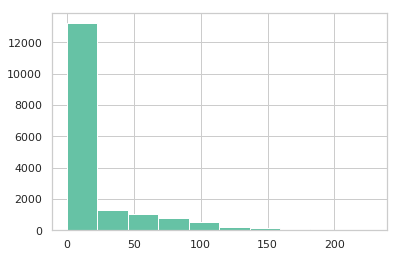

In [52]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([1.159424e+06, 5.700000e+03, 2.454000e+03, 9.140000e+02,
        2.140000e+02, 6.800000e+01, 1.400000e+01, 8.000000e+00,
        3.000000e+00, 1.000000e+00]),
 array([    0.,  2319.,  4638.,  6957.,  9276., 11595., 13914., 16233.,
        18552., 20871., 23190.]),
 <a list of 10 Patch objects>)

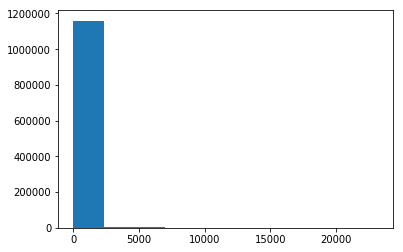

In [8]:
ft_2=ft2.iloc[:,2:].values
plt.hist(np.ravel(ft_2[:100]))

(array([1.154786e+06, 2.215000e+03, 3.781000e+03, 6.114000e+03,
        1.334000e+03, 2.590000e+02, 1.750000e+02, 1.000000e+02,
        2.800000e+01, 8.000000e+00]),
 array([-0.14161018,  2.35838785,  4.85838588,  7.3583839 ,  9.85838193,
        12.35837996, 14.85837798, 17.35837601, 19.85837404, 22.35837207,
        24.85837009]),
 <a list of 10 Patch objects>)

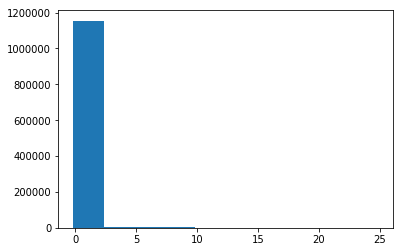

In [12]:
ft_2=ft2.iloc[:,2:].values
plt.hist(np.ravel(ft_2[:100]))

In [20]:
#merged_tsv3.iloc[1:tsv.shape[1],:]=zscore(merged_tsv3.iloc[1:tsv.shape[1],:],axis=1)

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/generic.py:7460: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return_indexers=True)


In [ ]:
print(predict_patient_class)

[[0.03499131 0.08375669 0.06752447 0.04351053 0.14268583 0.03641436
  0.01451072 0.04270548 0.03643983 0.01682173 0.02019312 0.03087942
  0.02435378 0.02066294 0.01880245 0.02438855 0.00999435 0.01856332
  0.05036507 0.04593492 0.01776543 0.02219421 0.03196942 0.02394016
  0.03243748 0.0158725  0.03234006 0.00938832 0.01029996 0.02029357]
 [0.05473343 0.07555728 0.06881123 0.0684493  0.10806538 0.04450867
  0.01364882 0.03187324 0.02182651 0.01705352 0.02612796 0.04207944
  0.0161479  0.03063292 0.01621843 0.03363796 0.00802404 0.01477512
  0.0434334  0.0314505  0.02668162 0.02494136 0.03549337 0.01613326
  0.04074946 0.01252563 0.02286058 0.00770293 0.02023056 0.02562618]
 [0.03750525 0.06634292 0.04751584 0.05125566 0.10363273 0.04487406
  0.01243171 0.04408197 0.04687023 0.02419254 0.01895428 0.04522894
  0.02400815 0.02538551 0.01742043 0.02461258 0.01375135 0.02851785
  0.04104792 0.04299851 0.01633293 0.02099704 0.0308033  0.02368939
  0.03020578 0.02310922 0.04387433 0.01595641 

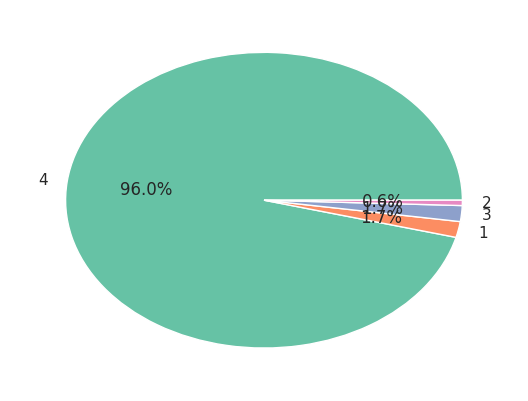

In [33]:
#predict
del merge_tsv2
predict_patient_classes=model1.predict(merged_tsv3.iloc[1:tsv.shape[1],:].values)
print(predict_patient_classes[:3])
del merged_tsv3
print(np.argmax(predict_patient_classes,axis=1))
pre_data=np.argmax(predict_patient_classes,axis=1).astype(np.int32)
del predict_patient_classes 
np.savetxt("TCGA-GBM.htseq_fpkm.csv",pre_data,delimiter=',')
c = collections.Counter(pre_data)
print(c)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

c_d=dict(c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(c_d.values(), labels=c_d.keys(), autopct="%1.1f%%")

plt.show()
##モデルの形と違っているのでおこられている
#おそらくmergeのあとで変化、、ft2ではあってる）
#mergeチェック、これもkillされているのでもういちっどモデルからやり直す

In [ ]:
print()

In [16]:
import sys
print("{}{:>25}{:>10}{}".format('|','valuable name','|','memory','|'))
print("-------")
for var in dir():
    if not var.startswith("_") and sys.getsizeof(eval(var))>10000:
        print("{}{:>25}{:>10}{}".format('|',var,'|',sys.getsizeof(eval(var)),'|'))

|            valuable name         |memory
-------
|                   X_test         |1313778064
|                      df4         |2805232
|                   pred_y         |350752
|                   y_test         |701392


In [82]:
del  merged_tsv3 

In [83]:
del merge_tsv2

In [26]:
df4

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [1]:
ls

GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/
GTEx_v7_Annotations_SampleAttributesDS.txt
TCGA-ACC.htseq_fpkm.npy
answer.csv
chap04_homework.ipynb
deeplearning.ipynb
file.ipynb
file_model.ipynb
patient/
patient data/
patient_model.ipynb
patient_model_apply.ipynb
test.npy
train.npy
